In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, add, Input

In [2]:
def Recurrent_block(input, channel, t=2):
    for i in range(t):
        if i == 0:
            x = Conv2D(channel, kernel_size=(3, 3), strides=1, padding='same')(input)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
        out = Conv2D(channel, kernel_size=(3, 3), strides=1, padding='same')(add([x, x]))
        out = BatchNormalization()(out)
        out = Activation('relu')(out)
    return out

def RRCNN_block(input, channel, t=2):
    x1 = Conv2D(channel, kernel_size=(1, 1), strides=1, padding='same')(input)
    x2 = Recurrent_block(x1, channel, t=t)
    x2 = Recurrent_block(x2, channel, t=t)
    out = add([x1, x2])
    return out

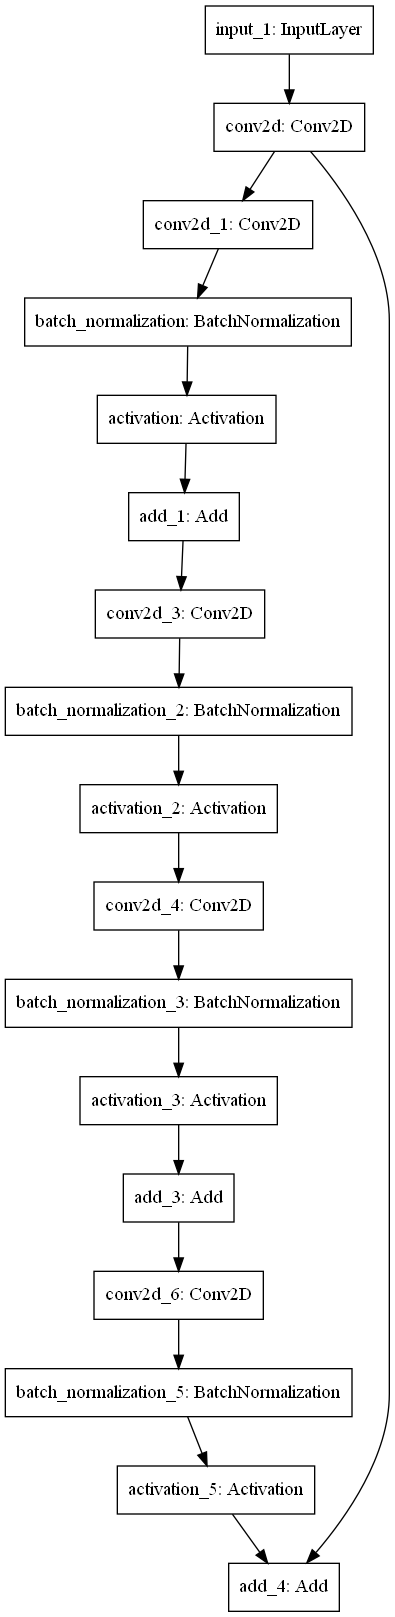

In [3]:
inputs = Input(shape=(512, 512, 3))
t = 2
n1 = 32
filters = [n1, n1 * 2, n1 * 4, n1 * 8, n1 * 16]
x = RRCNN_block(inputs, filters[0], t=t)
model = Model(inputs, x)
tf.keras.utils.plot_model(model, to_file='test.png')